Mustapha Abdulkadir Sani
mustapha.abdulkadir2205@gmail.com
week_3_solutions

1.Making a binary classification dataset with Scikit-Learn's make_moons() function.

In [2]:
# importing make_moons() function from scikilt learn library
from sklearn.datasets import make_moons

# setting up the number of samples
n_samples = 1000

# creating 1000 samples
X, y = make_moons(n_samples=n_samples, noise=0.03, random_state=42)



In [3]:
# Turning the data into PyTorch tensors
import torch
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

# view first 10 samples
print(X[:10])
print(y[:10])

tensor([[-0.0093,  0.3910],
        [ 0.9546, -0.4738],
        [ 0.9185, -0.4252],
        [ 0.4128, -0.3764],
        [-0.8453,  0.5288],
        [ 0.5795, -0.3530],
        [ 0.2949, -0.2092],
        [-0.0145,  0.4359],
        [ 1.6265, -0.2812],
        [ 0.6716,  0.7864]])
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])


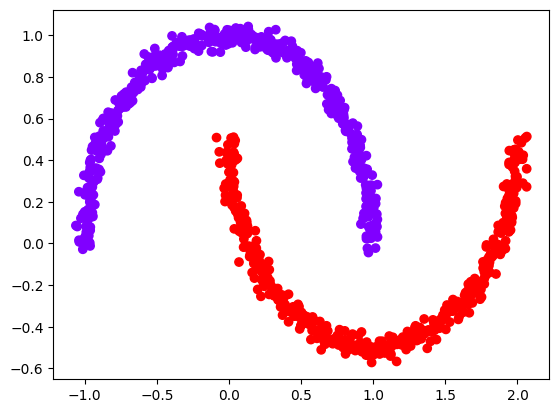

In [5]:
# doing some visulaization to discover the nature of the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.show()

In [4]:
# Splitting the data into training and test sets using train_test_split with 80% training and 20% testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking the size of the various sets
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

2. Building the model by subclassing nn.Module that incorporates non-linear activation functions whihch is capable of fitting the data I have created in 1 above

In [6]:
# importing the necessary modules
import torch
from torch import nn

# make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
# Building the model with non linear activation function
# the reason for using non linear activation is befause of the fact that
# by looking at the nature of our data we see that the data is no lineae
# therefore using linear model, the model can  not be able to separate
# our data into different  classes, ie liner model can not classify this data.

class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# instantiate the model and print its architecture
model=MoonModel()
model

MoonModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

3. Setting up a binary classification compatible loss function and optimizer

In [19]:
# set up loss function and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

In [50]:
# create a function that will calculate accuracy of the model
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

4. Creating the training and testing loop to fit the model I have created in 2 to the data I have created in 1.

In [21]:
# training the model

# set up manual seed
torch.manual_seed(42)

# set up number of epochs
epochs=1000

# store all the data in the target device
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

# creating the training loop
for epoch in range(epochs):

    # 1. forward pass
    y_logits=model(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    # 2. calculate loss and accuracy
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Teting the model ###
    model.eval() # put the model in evaluation mode
    with torch.inference_mode(): # turn on inference mode

        # 1. forward pass
        test_logits=model(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        # 2. calculate loss and accuracy on the test data
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    # print what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69537, Acc: 37.75% | Test Loss: 0.69457, Test Acc: 49.50%
Epoch: 10 | Loss: 0.68200, Acc: 76.50% | Test Loss: 0.68206, Test Acc: 73.00%
Epoch: 20 | Loss: 0.66786, Acc: 79.75% | Test Loss: 0.66920, Test Acc: 77.00%
Epoch: 30 | Loss: 0.65071, Acc: 77.62% | Test Loss: 0.65313, Test Acc: 73.00%
Epoch: 40 | Loss: 0.62607, Acc: 76.12% | Test Loss: 0.63009, Test Acc: 69.00%
Epoch: 50 | Loss: 0.59334, Acc: 75.12% | Test Loss: 0.59957, Test Acc: 71.50%
Epoch: 60 | Loss: 0.55276, Acc: 76.12% | Test Loss: 0.56132, Test Acc: 72.50%
Epoch: 70 | Loss: 0.50709, Acc: 77.25% | Test Loss: 0.51803, Test Acc: 74.50%
Epoch: 80 | Loss: 0.46099, Acc: 78.62% | Test Loss: 0.47418, Test Acc: 74.50%
Epoch: 90 | Loss: 0.41996, Acc: 80.25% | Test Loss: 0.43486, Test Acc: 75.50%
Epoch: 100 | Loss: 0.38636, Acc: 81.88% | Test Loss: 0.40196, Test Acc: 77.00%
Epoch: 110 | Loss: 0.35933, Acc: 83.00% | Test Loss: 0.37462, Test Acc: 78.50%
Epoch: 120 | Loss: 0.33713, Acc: 84.12% | Test Loss: 0.35130, T

5. Making predictions with my trained model and plotting them using the plot_decision_boundary() function created in the totorial notebook.

In [27]:
# making predictions
model.eval()
with torch.inference_mode():
    y_logits=model(X_test).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

y_pred[:15], y[:15]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.]))

In [32]:
# to plot decision boundary we need to dowload helper_function.py whihc contain
# a function for plotting decision boundary
# the following code is copied from the tutorial notebook

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

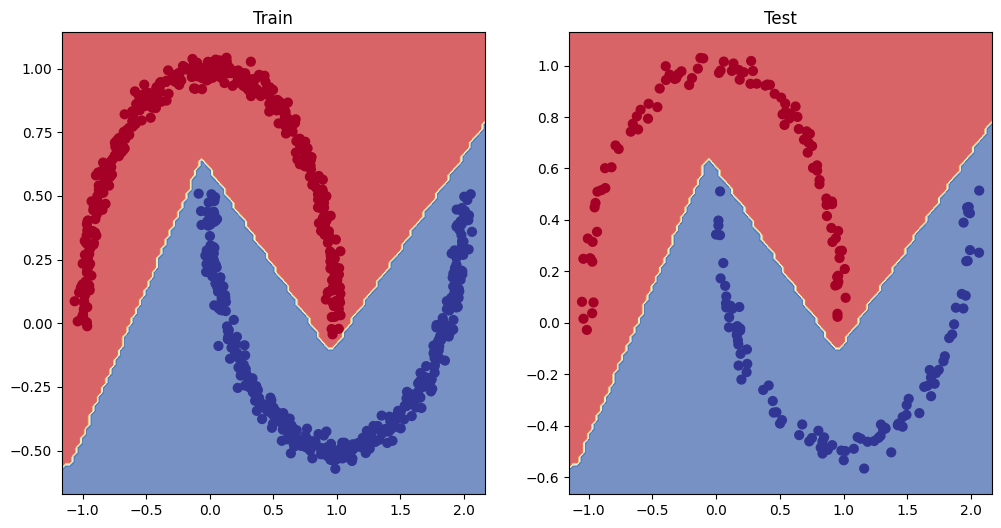

In [33]:
# plotting the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()

In [28]:
# replicating tanh function
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

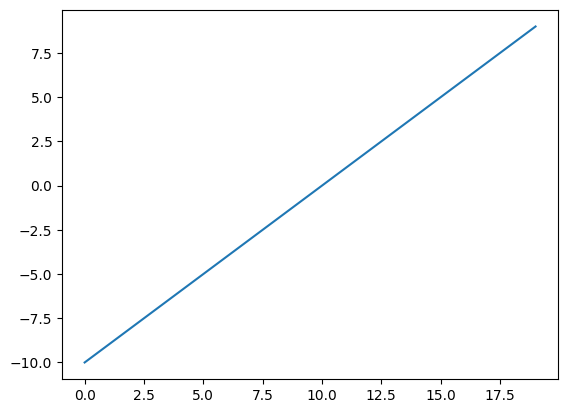

In [29]:
# Visualize the toy tensor
plt.plot(A);

In [34]:
# Create tanh function by hand
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Pass toy tensor through tanh function
tanh(A)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

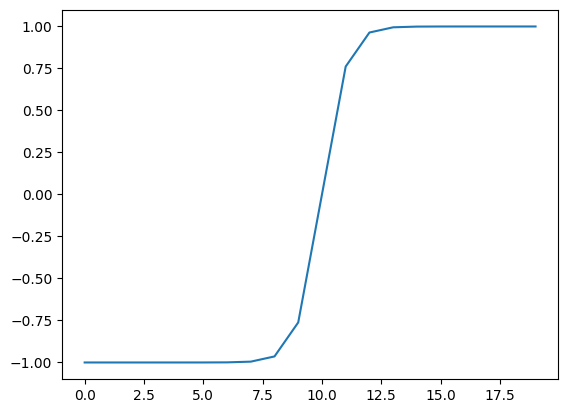

In [35]:
# Plot ReLU activated toy tensor
plt.plot(tanh(A));

7. Creating a multi-class dataset using the spirals data creation function from CS231n

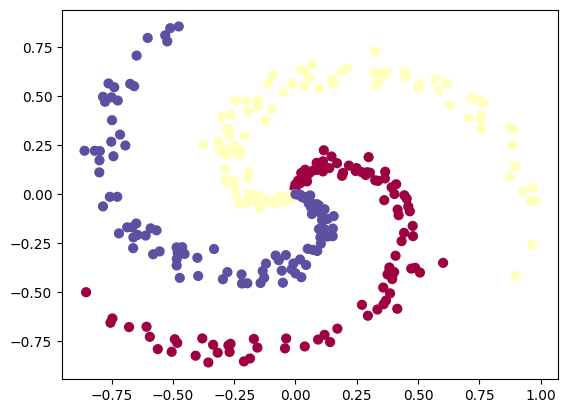

In [36]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [39]:
# now the data is ready, we begin by turning it into tensors
X=torch.tensor(X,dtype=torch.float)
y=torch.tensor(y,dtype=torch.long)

X[:5], y[:5]

<ipython-input-39-bd48b4c3adbe>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X=torch.tensor(X,dtype=torch.float)
<ipython-input-39-bd48b4c3adbe>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y,dtype=torch.long)


(tensor([[ 0.0000,  0.0000],
         [ 0.0022,  0.0099],
         [-0.0005,  0.0202],
         [-0.0037,  0.0301],
         [ 0.0024,  0.0403]]),
 tensor([0, 0, 0, 0, 0]))

In [42]:
# check the number of samples in the dataset
len(X), len(y)

(300, 300)

In [44]:
# check the last five samples
X[295:], y[295:]

(tensor([[-0.6481,  0.7076],
         [-0.5315,  0.8111],
         [-0.4763,  0.8563],
         [-0.5110,  0.8478],
         [-0.6029,  0.7978]]),
 tensor([2, 2, 2, 2, 2]))

In [49]:
# split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# building a multi-classifcation model to fit the data
import torch
from torch import nn

# make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"

class MultiClassModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# instantiate the model and put it on the target device
model=MultiClassModel(input_features=2,output_features=3).to(device)
model


MultiClassModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [63]:
# creating loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [88]:
# training the model

# set manual seed
torch.manual_seed(42)

# setting number of epochs
epochs=1000

# put data to the target device
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

# set the training loop
for epoch in range(epochs):
    ### Training ###
    model.train()

    # 1. forward pass
    y_logits=model(X_train)
    y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

    # 2. calculate loss and accuraccy
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4 loss backwars
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Testing ###
    model.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits=model(X_test)
        test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)

        # 2. calculate loss and accuracy
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    # print what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.17372, Acc: 93.33% | Test Loss: 0.16232, Test Acc: 93.33%
Epoch: 10 | Loss: 0.17363, Acc: 93.33% | Test Loss: 0.16223, Test Acc: 93.33%
Epoch: 20 | Loss: 0.17354, Acc: 93.33% | Test Loss: 0.16215, Test Acc: 93.33%
Epoch: 30 | Loss: 0.17344, Acc: 93.33% | Test Loss: 0.16203, Test Acc: 93.33%
Epoch: 40 | Loss: 0.17335, Acc: 93.33% | Test Loss: 0.16194, Test Acc: 93.33%
Epoch: 50 | Loss: 0.17326, Acc: 93.33% | Test Loss: 0.16185, Test Acc: 93.33%
Epoch: 60 | Loss: 0.17317, Acc: 93.33% | Test Loss: 0.16177, Test Acc: 93.33%
Epoch: 70 | Loss: 0.17307, Acc: 93.33% | Test Loss: 0.16168, Test Acc: 93.33%
Epoch: 80 | Loss: 0.17298, Acc: 93.33% | Test Loss: 0.16159, Test Acc: 93.33%
Epoch: 90 | Loss: 0.17289, Acc: 93.33% | Test Loss: 0.16151, Test Acc: 93.33%
Epoch: 100 | Loss: 0.17279, Acc: 93.33% | Test Loss: 0.16140, Test Acc: 93.33%
Epoch: 110 | Loss: 0.17270, Acc: 93.33% | Test Loss: 0.16131, Test Acc: 93.33%
Epoch: 120 | Loss: 0.17261, Acc: 93.33% | Test Loss: 0.16122, T

In [89]:
# Plotting the decision boundaries on the spirals dataset
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


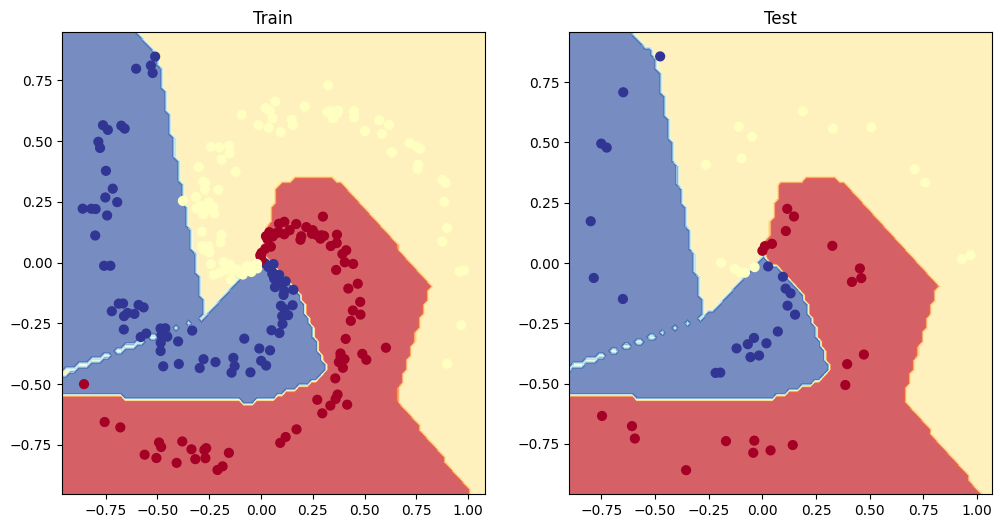

In [90]:
# plotting the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()